In [1]:
import nltk
import random
nltk.download('reuters')
nltk.download('punkt')
from nltk.corpus import reuters
from nltk.tokenize import word_tokenize
from nltk import bigrams, FreqDist, ConditionalFreqDist
from nltk.stem import PorterStemmer, WordNetLemmatizer


[nltk_data] Downloading package reuters to /home/ec2-user/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


A) Search for a fitting open-source dataset or document collection for analyzing the impact of stemming on an inverted index.

      I am using dataset available from nltk reuters for the assignment.
      
      Reuters provides corpus of text documents which can be used to experiment stemming and build inverted index

B) a) Create a Python function that applies stemming to a set of words from the chosen dataset. Provide examples before and after stemming. Discuss how stemming impacts the construction of an inverted index.

In [2]:

# Tokenize the corpus
corpus = reuters.sents()

tokens = [token for sentence in corpus for token in sentence]

ps = PorterStemmer()

stemmed_words = [ps.stem(word) for word in tokens]

print("Before stemming:")
print(tokens[:20])

print("\nAfter stemming:")
print(stemmed_words[:20])

print("\nBefore stemming count:")
print(len(set(tokens)))

print("\nAfter stemming count:")
print(len(set(stemmed_words)))


Before stemming:
['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', '.', 'S', '.-', 'JAPAN', 'RIFT', 'Mounting', 'trade', 'friction', 'between', 'the', 'U', '.', 'S', '.']

After stemming:
['asian', 'export', 'fear', 'damag', 'from', 'u', '.', 's', '.-', 'japan', 'rift', 'mount', 'trade', 'friction', 'between', 'the', 'u', '.', 's', '.']

Before stemming count:
41599

After stemming count:
23510


**Discuss how stemming impacts the construction of an inverted index.**

Stemming refers to a crude heuristic process that chops
off the ends of words and removes the derivational
affixes. It commonly collapses derivationally related words



*   Stemming reduces the total number of words in the vocabulary leading to reduced size of inverted index. As depicted in the above example, stemming has resulted in **50% reduction** of indexes
*   It helps to identify documents more effectively. Example. If user searches for the word 'compute', search would be able to retrieve documents containing compute, computer, compuational, computing, computed etc
*   There is a possibility that words are grouped wrongly. Example. relative and relativity are stemmed to 'rel', even though both words have very different meaning.
*   Stemming aims to increase recall, but can potentially cause drop in precision.
*   Stemming causes overload due to increased processing time and effort.





In [3]:
ps = PorterStemmer()
a = ps.stem('relative')
b = ps.stem('relativity')
print(f'relative is stemmed to {a} and relativity is also stemmed to {b}')

relative is stemmed to rel and relativity is also stemmed to rel


In [4]:
ps = PorterStemmer()
a = ps.stem('compute')
b = ps.stem('computer')
c = ps.stem('computational')
d = ps.stem('computing')
e = ps.stem('computed')
print(f'compute is stemmed to {a} and computer is stemmed to {b} \n and computational is stemmed to {c} and computing is stemmed to {d} and computed is also stemmed to {e}')

compute is stemmed to comput and computer is stemmed to comput 
 and computational is stemmed to comput and computing is stemmed to comput and computed is also stemmed to comput


b) Write a Python function that calculates term frequency and document frequency for a given term in an inverted index using the selected dataset. Discuss the significance of these metrics in the context of information retrieval.

In [20]:
# list of documents or doc id
filenames = reuters.fileids()
print(filenames[0])

test/14826


In [45]:
# defining inverted index data structure
inverted_index = {}


# method to add term index to the inverted index
def addToInIndex(terms, filename):
  for term in terms:
    if term not in inverted_index:
          inverted_index[term] = set()  # Using a set to store positions
    tf = calculate_tf(term, filename) # calculate term frequency
    inverted_index[term].add((filename, tf))
    

# method to calculate document frequency
def calculate_df(inverted_index, term):
    df = len(inverted_index.get(term))
    return df


# method to calculate term frequency
def calculate_tf(term, filename):
    tf_dict = {}
    doc = reuters.raw(filename)
    words = word_tokenize(doc)
    stemmed_words = [ps.stem(word) for word in words]
    for word in stemmed_words:
      tf_dict[word] = tf_dict.get(word, 0) + 1
    return tf_dict[term]


# fetch the term frequency for particular term
def get_term_frequency(term, doc_id):
    for idx in inverted_index[term]:
        if(idx[0]==doc_id):
            return indexes[1]

# to save computation we have only created inverted index for 100 documents.
top_100_documents = filenames[0:100]
for filename in top_100_documents:
  sample_document = reuters.raw(filename)
  words = word_tokenize(sample_document)
  stemmed_words = [ps.stem(word) for word in words]
  addToIndex(stemmed_words, filename) # adding token to inverted index

# Output of Inverted Index after computing above cell

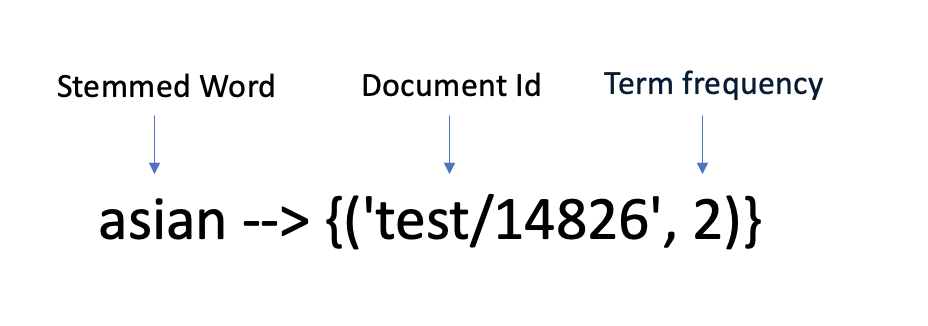

In [34]:
# Displaying first 10 inverted index of words
top_10_inverted_index = {k: inverted_index[k] for k in list(inverted_index)[:10]}
for x, y in top_10_inverted_index.items():
    print(x, '-->', y)
    print('\n')

asian --> {('test/14826', 2)}


export --> {('test/14903', 1), ('test/14833', 3), ('test/14909', 1), ('test/14931', 3), ('test/14923', 1), ('test/14881', 1), ('test/14858', 4), ('test/14988', 3), ('test/15017', 2), ('test/14891', 1), ('test/14882', 5), ('test/14912', 1), ('test/14826', 11), ('test/14832', 3), ('test/14862', 2)}


fear --> {('test/14826', 2)}


damag --> {('test/14931', 2), ('test/14982', 1), ('test/14826', 2), ('test/14892', 1)}


from --> {('test/14872', 5), ('test/14900', 2), ('test/14843', 4), ('test/14931', 1), ('test/14833', 1), ('test/14967', 1), ('test/14933', 2), ('test/14892', 2), ('test/14921', 3), ('test/14859', 1), ('test/14863', 1), ('test/14993', 2), ('test/14926', 1), ('test/14909', 1), ('test/14881', 1), ('test/14858', 4), ('test/14959', 1), ('test/14941', 1), ('test/14832', 4), ('test/14949', 1), ('test/14928', 4), ('test/14862', 5), ('test/14829', 1), ('test/14849', 2), ('test/14907', 1), ('test/14826', 3), ('test/14873', 1), ('test/14922', 2), ('test

In [56]:
# to get term frequency of particular token for given doc id
doc_id = 'test/14840'
word_term = 'trade'
print(f"Term Frequency for the word term --> '{word_term}' in doc '{doc_id}'")
print(get_term_frequency(word_term, doc_id))
print(f"Document Frequency for the word term --> '{word_term}'")
print(calculate_df(inverted_index, word_term))

Term Frequency for the word term --> 'trade' in doc 'test/14840'
14
Document Frequency for the word term --> 'trade'
23


In [ ]:
# df=calculate_df(inverted_index,'damag')
# print(f"Document frequency of damag is {df} \n")

# print("Inverted Index stores only document frequency and posting list. Term frequency is not stored. \nSo using primitive method to calculate term frequency:\n\n")

# for doc in list(inverted_index.get('damag'))[:10]:
#   tf=calculate_tf('damag', doc)
#   print(f"Term frequency of damag in {doc} is {tf}")


**Discuss the significance of these metrics in the context of information retrieval.**

Term Frequency (TF): It measures how often a term appears in a document. In the context of an inverted index, it helps in ranking documents based on their relevance to a search query. Higher TF indicates that the term is more significant within the document.

Document Frequency (DF): It counts how many documents contain a particular term. In information retrieval, DF helps in assessing the importance of a term across the entire corpus. Terms with higher DF but moderate TF may have greater discriminative power in distinguishing documents.

In the example above, the document frequency indicates that the term "damag" appears in 178 different documents throughout the corpus. The term frequency shows how many times the term "damag" occurs within each specific document.

These metrics are crucial in ranking documents and terms for information retrieval systems, search engines, and relevance-based ranking algorithms by assessing the importance of terms within documents and across the entire corpus.

Balancing these metrics helps in improving search accuracy by ensuring that retrieved documents are not only relevant but also contain the query terms sufficiently often to be considered significant. 